In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")

%matplotlib inline

Reading data
- number of records: 12032
- number of columns: 915
- some rows skipped because of datatype errors

In [2]:
awigen_data = pd.read_csv("../data/all_sites_v2.5.3.22.csv", sep=',', error_bad_lines=False, low_memory=False, quoting=csv.QUOTE_NONE, warn_bad_lines=False)

In [3]:
awigen_data.head()

,study_id,cohort_id_c,site_id,site,site_qc,region_qc,enrolment_date,interviewer_code,start_time,date_of_birth_known,...,blood_samples,abdominal_ultrasound,table_cimt,hiv_test,urine,quality_controller_id,reimbursement,test_results_notes,all_results_status,is_complete
0,FHN0V,NaN,V0210500020001,3,Nairobi,East Africa,2015-03-11,NaN,NaN,t,...,1.0,1.0,1.0,1.0,1.0,MILDRED,1.0,GROUP - A +VE,3.0,2.0
1,GQL0N,NaN,Y0250170020201,3,Nairobi,East Africa,2015-10-24,NaN,NaN,t,...,1.0,1.0,1.0,1.0,1.0,MILDRED,1.0,NaN,3.0,2.0
2,HHP0D,NaN,Y0040220020001,3,Nairobi,East Africa,2015-07-02,NaN,NaN,f,...,1.0,1.0,1.0,1.0,1.0,MILDRED,1.0,NaN,2.0,0.0
3,FIK0T,NaN,V0130510030001,3,Nairobi,East Africa,2015-03-22,NaN,NaN,f,...,1.0,1.0,1.0,1.0,1.0,MILDRED,1.0,O +VE.,3.0,2.0
4,FGM0R,NaN,V0072340040002,3,Nairobi,East Africa,2015-03-15,NaN,NaN,t,...,1.0,1.0,1.0,1.0,1.0,MILDRED,1.0,NaN,3.0,2.0


In [8]:
nrows = 12032
print("skipped ", nrows - awigen_data.shape[0], " rows")

skipped  186  rows


In [9]:
df = [x for _, x in awigen_data.groupby('site_qc')]

In [10]:
agincourt = df[0]
dikgale   = df[1]
nairobi   = df[2]
nanoro    = df[3]
navrongo  = df[4]
soweto    = df[5]

###### Agincourt

In [11]:
bins = [0, 39, 60, 70, 150]
labels = ['0-39', '40-60', '61-70', '70 plus']
agincourt['age_categories'] = pd.cut(awigen_data['age'], bins=bins, labels=labels)

In [12]:
for i in range(len(agincourt.index)) :
    print("Nan in row ", i , " : " ,agincourt.iloc[i]['study_id'], " : " , agincourt.iloc[i].isnull().sum())

Nan in row  0  :  AB0553  :  282
Nan in row  1  :  AB2750  :  307
Nan in row  2  :  AB2705  :  274
Nan in row  3  :  AB2259  :  301
Nan in row  4  :  AB0496  :  273
Nan in row  5  :  AB1482  :  265
Nan in row  6  :  AB2334  :  271
Nan in row  7  :  AB0600  :  284
Nan in row  8  :  AB0301  :  248
Nan in row  9  :  AB0790  :  272
Nan in row  10  :  AB0263  :  253
Nan in row  11  :  AB0605  :  257
Nan in row  12  :  AB2815  :  248
Nan in row  13  :  AB2510  :  254
Nan in row  14  :  AB0100  :  299
Nan in row  15  :  AB2817  :  282
Nan in row  16  :  AB2911  :  254
Nan in row  17  :  AB2889  :  254
Nan in row  18  :  AB2498  :  283
Nan in row  19  :  AB0569  :  260
Nan in row  20  :  AB2738  :  258
Nan in row  21  :  AB2920  :  264
Nan in row  22  :  AB0875  :  254
Nan in row  23  :  AB0361  :  245
Nan in row  24  :  AB0081  :  256
Nan in row  25  :  AB2453  :  266
Nan in row  26  :  AB1497  :  270
Nan in row  27  :  AB0771  :  276
Nan in row  28  :  AB2116  :  266
Nan in row  29  :  AB209

Nan in row  281  :  AB0008  :  280
Nan in row  282  :  AB0630  :  269
Nan in row  283  :  AB2516  :  273
Nan in row  284  :  AB0691  :  280
Nan in row  285  :  AB0599  :  265
Nan in row  286  :  AB2665  :  275
Nan in row  287  :  AB0736  :  286
Nan in row  288  :  AB2794  :  247
Nan in row  289  :  AB0428  :  254
Nan in row  290  :  AB0472  :  283
Nan in row  291  :  AB2246  :  272
Nan in row  292  :  AB2936  :  261
Nan in row  293  :  AB2530  :  273
Nan in row  294  :  AB2831  :  294
Nan in row  295  :  AB2721  :  294
Nan in row  296  :  AB2232  :  265
Nan in row  297  :  AB2645  :  284
Nan in row  298  :  AB2555  :  255
Nan in row  299  :  AB2980  :  282
Nan in row  300  :  AB2691  :  283
Nan in row  301  :  AB0177  :  275
Nan in row  302  :  AB2039  :  291
Nan in row  303  :  AB2156  :  260
Nan in row  304  :  AB0547  :  260
Nan in row  305  :  AB2355  :  383
Nan in row  306  :  AB1493  :  250
Nan in row  307  :  AB2256  :  257
Nan in row  308  :  AB2935  :  264
Nan in row  309  :  

Nan in row  515  :  AB0921  :  335
Nan in row  516  :  AB0468  :  288
Nan in row  517  :  AB1167  :  317
Nan in row  518  :  AB1266  :  297
Nan in row  519  :  AB1280  :  325
Nan in row  520  :  AB0393  :  274
Nan in row  521  :  AB0203  :  271
Nan in row  522  :  AB1088  :  329
Nan in row  523  :  AB1075  :  298
Nan in row  524  :  AB1295  :  301
Nan in row  525  :  AB1227  :  302
Nan in row  526  :  AB1068  :  309
Nan in row  527  :  AB1385  :  299
Nan in row  528  :  AB0909  :  302
Nan in row  529  :  AB1241  :  317
Nan in row  530  :  AB1338  :  317
Nan in row  531  :  AB1240  :  304
Nan in row  532  :  AB1135  :  310
Nan in row  533  :  AB1406  :  292
Nan in row  534  :  AB1446  :  334
Nan in row  535  :  AB1355  :  331
Nan in row  536  :  AB1072  :  324
Nan in row  537  :  AB1059  :  301
Nan in row  538  :  AB0939  :  327
Nan in row  539  :  AB1360  :  335
Nan in row  540  :  AB1379  :  319
Nan in row  541  :  AB0046  :  286
Nan in row  542  :  AB2045  :  260
Nan in row  543  :  

Nan in row  817  :  AB1015  :  287
Nan in row  818  :  AB1107  :  290
Nan in row  819  :  AB0923  :  383
Nan in row  820  :  AB0889  :  338
Nan in row  821  :  AB1440  :  331
Nan in row  822  :  AB1125  :  311
Nan in row  823  :  AB0650  :  230
Nan in row  824  :  AB0545  :  245
Nan in row  825  :  AB1083  :  310
Nan in row  826  :  AB1039  :  274
Nan in row  827  :  AB2786  :  261
Nan in row  828  :  AB0608  :  262
Nan in row  829  :  AB0183  :  266
Nan in row  830  :  AB0910  :  269
Nan in row  831  :  AB1103  :  313
Nan in row  832  :  AB1398  :  327
Nan in row  833  :  AB1177  :  300
Nan in row  834  :  AB0198  :  264
Nan in row  835  :  AB0542  :  246
Nan in row  836  :  AB2733  :  258
Nan in row  837  :  AB0517  :  251
Nan in row  838  :  AB0525  :  248
Nan in row  839  :  AB2908  :  263
Nan in row  840  :  AB0811  :  258
Nan in row  841  :  AB2270  :  277
Nan in row  842  :  AB2450  :  265
Nan in row  843  :  AB2828  :  269
Nan in row  844  :  AB1342  :  303
Nan in row  845  :  

Nan in row  1120  :  AB0477  :  242
Nan in row  1121  :  AB1259  :  309
Nan in row  1122  :  AB1179  :  304
Nan in row  1123  :  AB1371  :  321
Nan in row  1124  :  AB1051  :  308
Nan in row  1125  :  AB1229  :  344
Nan in row  1126  :  AB1277  :  317
Nan in row  1127  :  AB1451  :  323
Nan in row  1128  :  AB1438  :  326
Nan in row  1129  :  AB1452  :  313
Nan in row  1130  :  AB1101  :  302
Nan in row  1131  :  AB1151  :  313
Nan in row  1132  :  AB1377  :  310
Nan in row  1133  :  AB0913  :  325
Nan in row  1134  :  AB1260  :  342
Nan in row  1135  :  AB1200  :  324
Nan in row  1136  :  AB1031  :  363
Nan in row  1137  :  AB1089  :  322
Nan in row  1138  :  AB1305  :  328
Nan in row  1139  :  AB0887  :  317
Nan in row  1140  :  AB1178  :  296
Nan in row  1141  :  AB1364  :  306
Nan in row  1142  :  AB1137  :  317
Nan in row  1143  :  AB1275  :  320
Nan in row  1144  :  AB1436  :  338
Nan in row  1145  :  AB0891  :  319
Nan in row  1146  :  AB1414  :  309
Nan in row  1147  :  AB1085 

Nan in row  1353  :  AB0806  :  272
Nan in row  1354  :  AB0688  :  273
Nan in row  1355  :  AB0363  :  262
Nan in row  1356  :  AB0555  :  241
Nan in row  1357  :  AB0052  :  271
Nan in row  1358  :  AB2930  :  255
Nan in row  1359  :  AB2972  :  276
Nan in row  1360  :  AB0839  :  270
Nan in row  1361  :  AB2994  :  230
Nan in row  1362  :  AB0694  :  278
Nan in row  1363  :  AB2611  :  254
Nan in row  1364  :  AB2680  :  259
Nan in row  1365  :  AB0523  :  267
Nan in row  1366  :  AB0010  :  259
Nan in row  1367  :  AB2268  :  270
Nan in row  1368  :  AB0163  :  254
Nan in row  1369  :  AB0637  :  288
Nan in row  1370  :  AB0278  :  268
Nan in row  1371  :  AB0418  :  276
Nan in row  1372  :  AB0171  :  266
Nan in row  1373  :  AB2718  :  266
Nan in row  1374  :  AB0386  :  244
Nan in row  1375  :  AB0493  :  272
Nan in row  1376  :  AB0299  :  261
Nan in row  1377  :  AB2183  :  231
Nan in row  1378  :  AB0953  :  275
Nan in row  1379  :  AB2948  :  279
Nan in row  1380  :  AB2962 

Nan in row  1653  :  AB0312  :  275
Nan in row  1654  :  AB0372  :  279
Nan in row  1655  :  AB0503  :  291
Nan in row  1656  :  AB2185  :  260
Nan in row  1657  :  AB2709  :  261
Nan in row  1658  :  AB2679  :  271
Nan in row  1659  :  AB2727  :  273
Nan in row  1660  :  AB0623  :  267
Nan in row  1661  :  AB2649  :  265
Nan in row  1662  :  AB2143  :  256
Nan in row  1663  :  AB0438  :  266
Nan in row  1664  :  AB2768  :  264
Nan in row  1665  :  AB2574  :  282
Nan in row  1666  :  AB2652  :  277
Nan in row  1667  :  AB2613  :  273
Nan in row  1668  :  AB2233  :  259
Nan in row  1669  :  AB2544  :  289
Nan in row  1670  :  AB2676  :  283
Nan in row  1671  :  AB2188  :  245
Nan in row  1672  :  AB0409  :  261
Nan in row  1673  :  AB2937  :  263
Nan in row  1674  :  AB2328  :  265
Nan in row  1675  :  AB0332  :  240
Nan in row  1676  :  AB0366  :  266
Nan in row  1677  :  AB2278  :  275
Nan in row  1678  :  AB1431  :  339
Nan in row  1679  :  AB2082  :  245
Nan in row  1680  :  AB0970 

Nan in row  1935  :  AB0341  :  233
Nan in row  1936  :  AB0325  :  261
Nan in row  1937  :  AB0573  :  245
Nan in row  1938  :  AB0195  :  263
Nan in row  1939  :  AB2272  :  258
Nan in row  1940  :  AB0751  :  264
Nan in row  1941  :  AB0211  :  259
Nan in row  1942  :  AB2900  :  280
Nan in row  1943  :  AB0695  :  277
Nan in row  1944  :  AB2155  :  293
Nan in row  1945  :  AB2167  :  251
Nan in row  1946  :  AB0733  :  249
Nan in row  1947  :  AB2384  :  268
Nan in row  1948  :  AB0298  :  256
Nan in row  1949  :  AB1454  :  279
Nan in row  1950  :  AB0976  :  243
Nan in row  1951  :  AB0946  :  253
Nan in row  1952  :  AB1491  :  235
Nan in row  1953  :  AB0814  :  274
Nan in row  1954  :  AB0665  :  287
Nan in row  1955  :  AB0840  :  272
Nan in row  1956  :  AB0441  :  258
Nan in row  1957  :  AB2178  :  247
Nan in row  1958  :  AB0415  :  267
Nan in row  1959  :  AB0492  :  244
Nan in row  1960  :  AB0776  :  276
Nan in row  1961  :  AB0296  :  259
Nan in row  1962  :  AB0249 

Nan in row  2178  :  AB2064  :  259
Nan in row  2179  :  AB0704  :  303
Nan in row  2180  :  AB2305  :  272
Nan in row  2181  :  AB0012  :  269
Nan in row  2182  :  AB0402  :  288
Nan in row  2183  :  AB0703  :  271
Nan in row  2184  :  AB0748  :  284
Nan in row  2185  :  AB2704  :  280
Nan in row  2186  :  AB2394  :  257
Nan in row  2187  :  AB0020  :  283
Nan in row  2188  :  AB2309  :  282
Nan in row  2189  :  AB0689  :  274
Nan in row  2190  :  AB2179  :  287
Nan in row  2191  :  AB2099  :  269
Nan in row  2192  :  AB2356  :  280
Nan in row  2193  :  AB2077  :  263
Nan in row  2194  :  AB2198  :  246
Nan in row  2195  :  AB2546  :  283
Nan in row  2196  :  AB0344  :  271
Nan in row  2197  :  AB0410  :  262
Nan in row  2198  :  AB0247  :  264
Nan in row  2199  :  AB2651  :  274
Nan in row  2200  :  AB2113  :  287
Nan in row  2201  :  AB2377  :  267
Nan in row  2202  :  AB2899  :  268
Nan in row  2203  :  AB2761  :  292
Nan in row  2204  :  AB0784  :  263
Nan in row  2205  :  AB2751 

Nan in row  2442  :  AB1022  :  385
Nan in row  2443  :  AB0885  :  341
Nan in row  2444  :  AB1138  :  303
Nan in row  2445  :  AB1421  :  314
Nan in row  2446  :  AB1248  :  310
Nan in row  2447  :  AB1455  :  336
Nan in row  2448  :  AB1463  :  324
Nan in row  2449  :  AB1183  :  329
Nan in row  2450  :  AB1253  :  326
Nan in row  2451  :  AB1404  :  313
Nan in row  2452  :  AB1279  :  298
Nan in row  2453  :  AB1457  :  326
Nan in row  2454  :  AB1301  :  307
Nan in row  2455  :  AB1267  :  309
Nan in row  2456  :  AB0919  :  309
Nan in row  2457  :  AB1437  :  314
Nan in row  2458  :  AB1143  :  313
Nan in row  2459  :  AB1395  :  306
Nan in row  2460  :  AB1286  :  307
Nan in row  2461  :  AB1369  :  317
Nan in row  2462  :  AB0937  :  309
Nan in row  2463  :  AB2841  :  277
Nan in row  2464  :  AB2239  :  262
Nan in row  2465  :  AB2965  :  293
Nan in row  2466  :  AB2290  :  264
Nan in row  2467  :  AB2224  :  256
Nan in row  2468  :  AB0068  :  258
Nan in row  2469  :  AB1367 

In [13]:
# list of columns
cols = ['date_of_birth_known', 'use_drug', 
        'tobacco_use', 'hiv_final_status_c', 
        'alcohol_status_c_qc', 'smoking_status_c_qc']

# takes in dataframe and list of columns
def cross_tabs(agincourt, li):
    for l in li:
        print("_____________",l,"____________")
        g = pd.crosstab(agincourt['age_categories'], agincourt[l], margins=True, margins_name='Total', normalize='index').round(4)*100
        print(g, "\n")

cross_tabs(agincourt, cols)

_____________ date_of_birth_known ____________
date_of_birth_known      t
age_categories            
40-60                100.0
61-70                100.0
70 plus              100.0
Total                100.0 

_____________ use_drug ____________
use_drug          0.0   1.0   2.0
age_categories                   
40-60           91.05  8.88  0.07
61-70           90.91  9.09  0.00
70 plus         97.41  2.40  0.20
Total           92.31  7.61  0.08 

_____________ tobacco_use ____________
tobacco_use       0.0    1.0
age_categories              
40-60           80.18  19.82
61-70           75.19  24.81
70 plus         80.44  19.56
Total           79.19  20.81 

_____________ hiv_final_status_c ____________
hiv_final_status_c      0      1     2
age_categories                        
40-60               65.39  34.47  0.14
61-70               81.54  18.46  0.00
70 plus             90.22   9.58  0.20
Total               73.77  26.11  0.12 

_____________ alcohol_status_c_qc ____________
alc

In [152]:
# list of columns
cols = ['date_of_birth_known', 'use_drug', 
        'tobacco_use', 'hiv_final_status_c', 
        'alcohol_status_c_qc', 'smoking_status_c_qc']

# takes in dataframe and list of columns
def cross_tabs_counts(agincourt, li):
    for l in li:
        print("_____________",l,"____________")
        g = pd.crosstab(agincourt['age_categories'], agincourt[l], margins_name='Total')
        print(g, "\n")

cross_tabs_counts(agincourt, cols)

_____________ date_of_birth_known ____________
date_of_birth_known     t
age_categories           
0-40                   10
41-60                1455
61-70                 520
70 plus               501 

_____________ use_drug ____________
use_drug         0.0  1.0  2.0
age_categories                
0-40               9    1    0
41-60           1313  128    1
61-70            470   47    0
70 plus          488   12    1 

_____________ tobacco_use ____________
tobacco_use      0.0  1.0
age_categories           
0-40               8    2
41-60           1165  288
61-70            391  129
70 plus          403   98 

_____________ hiv_final_status_c ____________
hiv_final_status_c    0    1  2
age_categories                 
0-40                  4    6  0
41-60               954  499  2
61-70               424   96  0
70 plus             452   48  1 

_____________ alcohol_status_c_qc ____________
alcohol_status_c_qc    0    1    2
age_categories                    
0-40             

In [156]:
missing_bmi = agincourt[agincourt.bmi_qc == -999]
print("Agincourt missing bmi: ", missing_bmi['bmi_qc'].shape[0])

bmi_qc = agincourt[agincourt.bmi_qc >= 0]
print("Agincourt with bmi: ", bmi_qc['bmi_qc'].shape[0] , "\n")
print(bmi_qc['bmi_qc'].describe())

Agincourt missing bmi:  545
Agincourt with bmi:  1941 

count    1941.000000
mean       27.223287
std         6.667631
min        14.200000
25%        22.100000
50%        26.140000
75%        31.320000
max        68.020000
Name: bmi_qc, dtype: float64


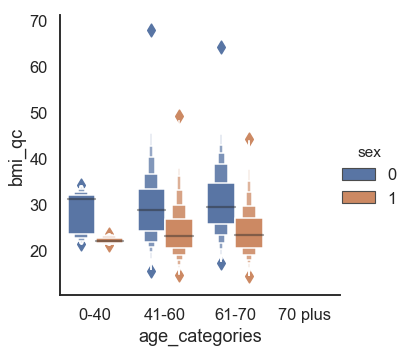

In [154]:
sns.catplot(x="age_categories", y="bmi_qc", hue="sex",
            kind="boxen", data=bmi_qc);